In [1]:
from pyvisgen.simulation.utils import calc_ref_elev
from datetime import datetime
import pandas as pd
import numpy as np
import astropy.units as un
from astropy.time import Time
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from pyvisgen.layouts.layouts import get_array_layout

In [2]:
# try different observation dates
scan_start = datetime.strptime("18-1-2021 6:0:1", "%d-%m-%Y %H:%M:%S")

In [3]:
start_time = Time(scan_start.isoformat(), format="isot")

# try different intervals and integration times / units are seconds
interval = 360
num_scans = 1
scan_duration = 360
int_time = 15

time_lst = [
    start_time + interval * i * un.second + j * int_time * un.second
    for i in range(num_scans)
    for j in range(int(scan_duration / int_time) + 1)
]
time = Time(time_lst)
time.shape

(25,)

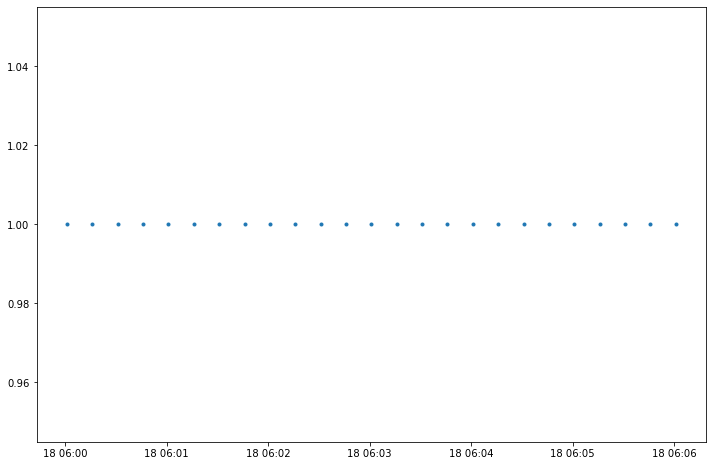

In [4]:
# plot time steps
plt.figure(figsize=(12,8))
plt.plot(time.datetime, np.ones(time.shape), marker=".", linestyle="none")

In [5]:
# try different source coordinates
src_crd = SkyCoord(
    ra=137,
    dec=34,
    unit=(un.deg, un.deg),
)

array_layout = get_array_layout("vla")

_, el_st_all = calc_ref_elev(src_crd, time, array_layout)
print(el_st_all[0])

# this is fixed for the telescopes
el_min = 15
el_max = 75

valid = np.where((el_st_all >= el_min) & (el_st_all <= el_max), np.ones(el_st_all.shape), 0)
telescopes = valid * (np.arange(28) + 1)

[59.45441696 59.42492996 59.43560109 59.44401955 59.4355367  59.41870372
 59.43547195 59.43044743 59.43735472 59.45068632 59.43911547 59.45855358
 59.42215729 59.43549136 59.41492211 59.43553383 59.43512177 59.43560022
 59.43613891 59.44134061 59.43403561 59.43552479 59.43557475 59.43555851
 59.43554835 59.428052   59.43245418 59.44713497]


In [6]:
from astropy.coordinates import EarthLocation, AltAz, Angle
ha_all = Angle(
    [t.sidereal_time("apparent", "greenwich") - src_crd.ra for t in time]
)
ha_all.deg

array([70.8706793 , 70.93335042, 70.99602154, 71.05869265, 71.12136377,
       71.18403488, 71.246706  , 71.30937712, 71.37204823, 71.43471935,
       71.49739046, 71.56006158, 71.6227327 , 71.68540381, 71.74807493,
       71.81074604, 71.87341716, 71.93608828, 71.99875939, 72.06143051,
       72.12410162, 72.18677274, 72.24944386, 72.31211497, 72.37478609])

In [7]:
valid

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1

(0.0, 29.0)

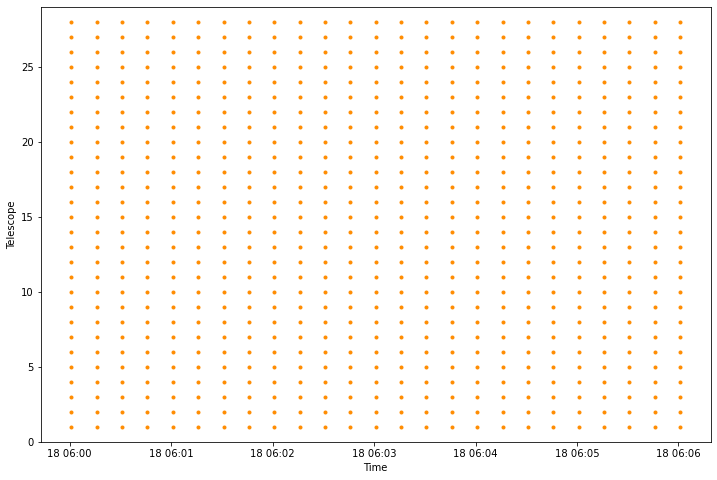

In [8]:
plt.figure(figsize=(12,8))
plt.plot(time.datetime, telescopes, color="darkorange", marker=".", linestyle="none")

plt.ylabel("Telescope")
plt.xlabel("Time")
plt.ylim(0, 29)

In [9]:
import geopandas
import geoplot
import geoplot.crs as gcrs

In [10]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

In [11]:
world["gdp_pp"] = world["gdp_md_est"] / world["pop_est"]

In [12]:
from shapely.geometry import Point

d = {'col1': ['ant1', 'ant2', 'ant3', 'ant4', 'ant5', 'ant6', 'ant7', 'ant8', 'ant9', 'ant10'],
     'geometry': [
    Point(array_layout.x[0], array_layout.y[0], array_layout.z[0]),
    Point(array_layout.x[1], array_layout.y[1], array_layout.z[1]),
    Point(array_layout.x[2], array_layout.y[2], array_layout.z[2]),
    Point(array_layout.x[3], array_layout.y[3], array_layout.z[3]),
    Point(array_layout.x[4], array_layout.y[4], array_layout.z[4]),
    Point(array_layout.x[5], array_layout.y[5], array_layout.z[5]),
    Point(array_layout.x[6], array_layout.y[6], array_layout.z[6]),
    Point(array_layout.x[7], array_layout.y[7], array_layout.z[7]),
    Point(array_layout.x[8], array_layout.y[8], array_layout.z[8]),
    Point(array_layout.x[9], array_layout.y[9], array_layout.z[9]),
]}
gdf = geopandas.GeoDataFrame(d, crs=4328)

/tmp/ipykernel_3069209/1818496961.py:5: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(True)


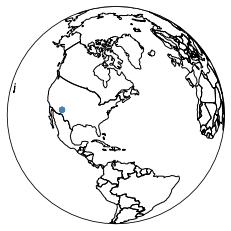

In [13]:
ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(central_longitude=360-ha_all.deg[0], central_latitude=37), figsize=(8, 4)
)
geoplot.pointplot(gdf.to_crs("epsg:4326"), projection=geoplot.crs.Orthographic(central_longitude=360-137, central_latitude=37), ax=ax)
ax.outline_patch.set_visible(True)
ax.set_global()